# Downloading and plotting soundfiles

Below represents my attempts to download and convert the sound files in the small sample into a spectrogram.

In [1]:
# Standard modules

import numpy as np
import matplotlib.pyplot as plt
import librosa

The best method I've found for downloading data from Huggingface is to run <code>pip install datasets</code> or <code>python -m pip install datasets</code> in the terminal. This gives you a way to access their datasets that does not involve downloading a parquet file or anything else. (Some kind of API?)

In [ ]:
!pip install datasets #For anyone running this in Colab

In [2]:
# Loading the dataset

from datasets import load_dataset

songs = load_dataset("lewtun/music_genres_small", split='train')
songs


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Dataset({
    features: ['audio', 'song_id', 'genre_id', 'genre'],
    num_rows: 1000
})

Below is an example of a song. As you can see, each item is a dictionary, and the sampling can be found in <code>['audio']['array']</code>.

In [3]:
songs[0]

{'audio': {'path': None,
  'array': array([ 0.        ,  0.        ,  0.        , ..., -0.00328412,
         -0.00250573, -0.00360047]),
  'sampling_rate': 44100},
 'song_id': 11483,
 'genre_id': 9,
 'genre': 'International'}

In [4]:
first_song_audio = songs[0]['audio']['array']
L = len(first_song_audio)

We include a plot of the audio signal. Note that we normalize the time variable using the sampling rate to plot the signal against time appropriately.

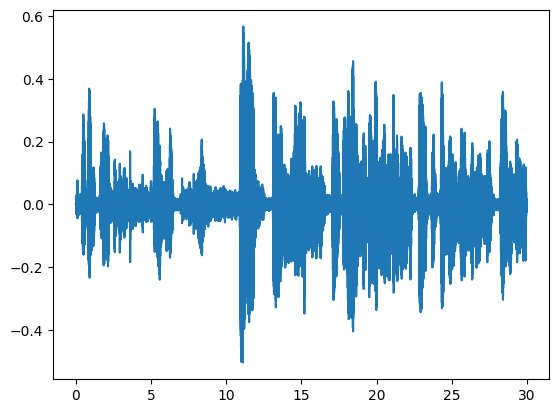

In [6]:
plt.plot(np.arange(L)/44100, first_song_audio)

Below is an example of a spectrogram from the audio signal above. This is a modification of the example found [here](https://huggingface.co/learn/audio-course/chapter1/audio_data). I'm not yet sure if this is correct since experiments earlier with single frequency signals did not yield the right answer. I think I need a better understanding of the <code>librosa.stft</code> function.

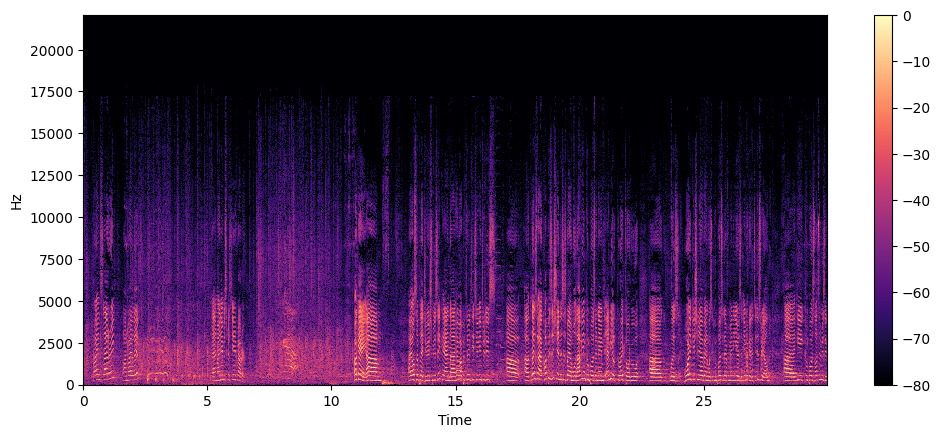

In [8]:
D = librosa.stft(first_song_audio, n_fft=2048) #
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz", sr=44100) #Added correct sampling rate.
plt.colorbar()

Ultimately, we'll want to use y_axis = log (equally spaced octaves) or mel (default for most applications)

Text(0.5, 1.0, 'Mel frequency scale')

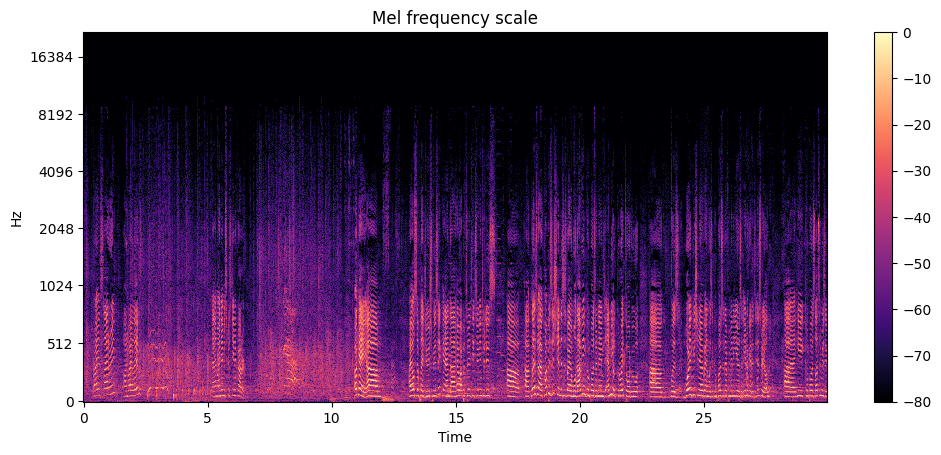

In [11]:
plt.figure().set_figwidth(12)

librosa.display.specshow(S_db, x_axis="time", y_axis="mel", sr=44100)
plt.colorbar()
plt.title("Mel frequency scale")

Text(0.5, 1.0, 'Log frequency scale with restriction on bounds')

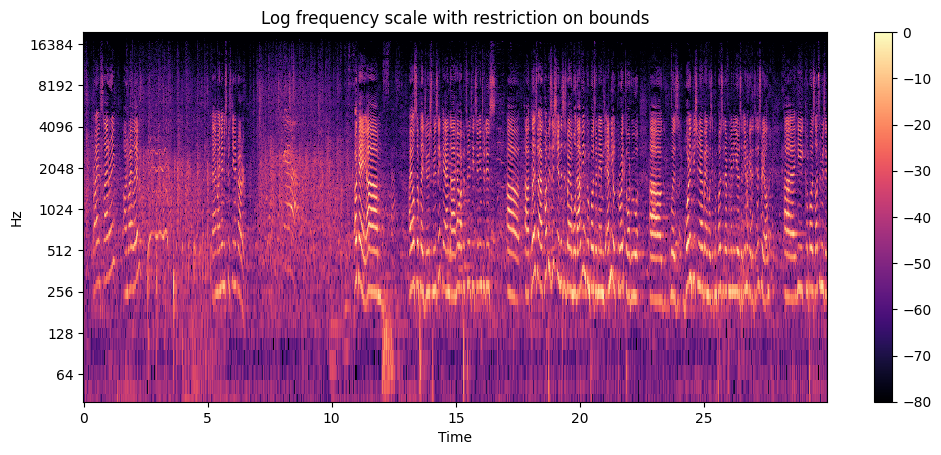

In [12]:
plt.figure().set_figwidth(12)

librosa.display.specshow(S_db, x_axis="time", y_axis="log", sr=44100)
plt.colorbar()
plt.ylim([20, 20000])
plt.title("Log frequency scale with restriction on bounds")

Log appears to go all the way down to 0Hz for some reason.
This is well below where musical content is found, so I've restricted the range.

The frequency resolution is a little messier down there, but it can be tightened up a little by increasing n_fft when the stft is called.